In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import graphviz

In [2]:
df_monday = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/CDR_by_day_of_week/cdr_monday.csv', index_col=False)
df_monday.drop(columns={'Unnamed: 0'}, inplace=True)

df_tuesday = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/CDR_by_day_of_week/cdr_tuesday.csv')
df_tuesday.drop(columns={'Unnamed: 0'}, inplace=True)

df_wednesday = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/CDR_by_day_of_week/cdr_wednesday.csv')
df_wednesday.drop(columns={'Unnamed: 0'}, inplace=True)

df_thursday = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/CDR_by_day_of_week/cdr_thursday.csv')
df_thursday.drop(columns={'Unnamed: 0'}, inplace=True)

df_friday = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/CDR_by_day_of_week/cdr_friday.csv')
df_friday.drop(columns={'Unnamed: 0'}, inplace=True)

In [3]:
df_weekdays = df_monday.append([df_tuesday, df_wednesday, df_thursday, df_friday])
df_weekdays.rename(columns={'USER_FROM': 'USER'}, inplace=True)

In [4]:
df_weekdays[df_weekdays['USER'] == '6DE5DFDBD31D50256FF9D7BD55B111C1']

,DATE,HOUR,DURATION,DDD_USER_FROM,USER,DDD_USER_TO,USER_TO,ANTENNA,9,10,11,12,13,14,DAY_OF_WEEK
0,2013-03-25,19:13:00,0.07,32,6DE5DFDBD31D50256FF9D7BD55B111C1,32,3017748B03D2CD346C8562616DE59920,50141,117,LOCAL,OI,OI,POS PAGO,300000251,Monday
7,2013-03-25,16:58:29,0.35,32,6DE5DFDBD31D50256FF9D7BD55B111C1,32,5BDFB7CA3BB332C284CF92AECC4DC5F7,50141,77,LOCAL,OI,TNL,POS PAGO,300000251,Monday
8,2013-03-25,19:15:19,0.67,32,6DE5DFDBD31D50256FF9D7BD55B111C1,32,E7EA96860B3D6BB5DB5F8F8DDC86AE1B,50141,77,LOCAL,OI,TNL,POS PAGO,300000251,Monday
54,2013-03-25,19:07:52,1.07,32,6DE5DFDBD31D50256FF9D7BD55B111C1,32,219161B94AA57F110089111916093765,50141,117,LOCAL,OI,OI,POS PAGO,300000251,Monday
231,2013-03-25,19:21:13,1.70,32,6DE5DFDBD31D50256FF9D7BD55B111C1,32,3017748B03D2CD346C8562616DE59920,23451,117,LOCAL,OI,OI,POS PAGO,300000251,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177910,2013-04-19,17:34:43,2.48,32,6DE5DFDBD31D50256FF9D7BD55B111C1,31,57A4B450D24005FF4E5EF26C39CB13F3,23461,154,LONGA DISTANCIA,OI,EMBRATEL,POS PAGO,300000251,Friday
1178719,2013-04-19,15:29:19,0.97,32,6DE5DFDBD31D50256FF9D7BD55B111C1,32,87FD09F409978416EE8EEF5F3AE8422E,23461,117,LOCAL,OI,OI,POS PAGO,300000251,Friday
1178860,2013-04-19,16:46:48,0.82,32,6DE5DFDBD31D50256FF9D7BD55B111C1,32,063628DB57A70DB0A7F75CE1C7A7108E,23461,77,LOCAL,OI,TNL,POS PAGO,300000251,Friday
1179084,2013-04-19,17:37:36,0.77,32,6DE5DFDBD31D50256FF9D7BD55B111C1,32,5E505F0AB257815400B197B7BF66BB22,23461,117,LOCAL,OI,OI,POS PAGO,300000251,Friday


In [5]:
df_presumed_residence = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/Regiao_Presumida/df_final.csv')
df_presumed_residence[df_presumed_residence['USER'] == '0008B7FB336065A53EC31AD06D712E28']

,USER,PRESUMED_RESIDENCE,CALL_LOC,TRAVELLED_DISTANCE
3,0008B7FB336065A53EC31AD06D712E28,RT,"['RT', 'RT', 'RT', 'RT', 'RT', 'RT', 'RT', 'RT']",0.0


In [15]:
df = pd.merge(df_weekdays, df_presumed_residence, on='USER')

In [16]:
df = df[['DATE', 'USER', 'DAY_OF_WEEK', 'PRESUMED_RESIDENCE', 'CALL_LOC', 'TRAVELLED_DISTANCE']]
df = df.groupby(['DATE', 'USER', 'CALL_LOC']).first().reset_index()

In [17]:
df['CALL_LOC'] = df['CALL_LOC'].apply(lambda x: x.strip('][').split(', '))
df['CALL_LOC'] = df['CALL_LOC'].apply(lambda x: set(x))
df

,DATE,USER,CALL_LOC,DAY_OF_WEEK,PRESUMED_RESIDENCE,TRAVELLED_DISTANCE
0,2013-03-21,0008B7FB336065A53EC31AD06D712E28,{'RT'},Thursday,RT,0.0000
1,2013-03-21,0008B8E32E18BF4450B7CAAF0C1CE179,{'SJDR1'},Thursday,SJDR1,0.0000
2,2013-03-21,000D1DF8B25B4C1728D16E1510BC72BE,{'SJDR5'},Thursday,SJDR5,0.0000
3,2013-03-21,000FEF29098C6C17FDE52CF7B3AD30A1,{'SJDR3'},Thursday,SJDR3,0.0000
4,2013-03-21,0014D12E96959533E7BBB4B574635B83,"{'SJDR4', 'SJDR1'}",Thursday,SJDR1,7.8954
...,...,...,...,...,...,...
513013,2013-04-19,FFF724C0B04D7E1929841DAF01AF0882,{'RT'},Friday,RT,0.0000
513014,2013-04-19,FFF79EB51D69874C568078A247E67EC4,{'SJDR4'},Friday,SJDR4,0.0000
513015,2013-04-19,FFF86C53FFCAA56CE02B31576A088F64,{'SJDR5'},Friday,SJDR5,0.0000
513016,2013-04-19,FFFDA183352D8DD3AC2913B09BD4174F,{'SJDR4'},Friday,SJDR4,0.0000


In [18]:
cities = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/ibge/sjdr_data_grouped_of_class.csv')
cities

,Nome_do_municipio,V005,classe
0,CONCEIÇÃO DA BARRA DE MINAS,801.815000,2
1,CORONEL XAVIER CHAVES,836.657778,2
2,DORES DE CAMPOS,796.102353,2
3,LAGOA DOURADA,917.415789,2
4,MADRE DE DEUS DE MINAS,809.078333,2
5,NAZARENO,778.055000,2
6,PIEDADE DO RIO GRANDE,759.075625,2
7,PRADOS,782.115000,2
8,RESENDE COSTA,905.867826,2
9,RITÁPOLIS,716.333846,2


In [19]:
def classe(i):
    if (i.startswith('SJDR')) | (i.startswith('TR')):
        return 3
    else:
        return 2

df['CLASS_LOCATION_CALL'] = df['PRESUMED_RESIDENCE'].map(classe)

,DATE,USER,CALL_LOC,DAY_OF_WEEK,PRESUMED_RESIDENCE,TRAVELLED_DISTANCE,CLASS_LOCATION_CALL
0,2013-03-21,0008B7FB336065A53EC31AD06D712E28,{'RT'},Thursday,RT,0.0000,2
1,2013-03-21,0008B8E32E18BF4450B7CAAF0C1CE179,{'SJDR1'},Thursday,SJDR1,0.0000,3
2,2013-03-21,000D1DF8B25B4C1728D16E1510BC72BE,{'SJDR5'},Thursday,SJDR5,0.0000,3
3,2013-03-21,000FEF29098C6C17FDE52CF7B3AD30A1,{'SJDR3'},Thursday,SJDR3,0.0000,3
4,2013-03-21,0014D12E96959533E7BBB4B574635B83,"{'SJDR4', 'SJDR1'}",Thursday,SJDR1,7.8954,3
...,...,...,...,...,...,...,...
513013,2013-04-19,FFF724C0B04D7E1929841DAF01AF0882,{'RT'},Friday,RT,0.0000,2
513014,2013-04-19,FFF79EB51D69874C568078A247E67EC4,{'SJDR4'},Friday,SJDR4,0.0000,3
513015,2013-04-19,FFF86C53FFCAA56CE02B31576A088F64,{'SJDR5'},Friday,SJDR5,0.0000,3
513016,2013-04-19,FFFDA183352D8DD3AC2913B09BD4174F,{'SJDR4'},Friday,SJDR4,0.0000,3


In [20]:
df_2 = df[df['CLASS_LOCATION_CALL'] == 2]
df_2

,DATE,USER,CALL_LOC,DAY_OF_WEEK,PRESUMED_RESIDENCE,TRAVELLED_DISTANCE,CLASS_LOCATION_CALL
0,2013-03-21,0008B7FB336065A53EC31AD06D712E28,{'RT'},Thursday,RT,0.0,2
8,2013-03-21,001AB2E37F7F1378CABAB1D424EBD134,{'MDM'},Thursday,MDM,0.0,2
9,2013-03-21,001BB500FDAE643F9B2121BB19DE198E,{'RT'},Thursday,RT,0.0,2
10,2013-03-21,001E1CED721CCDD6A200736AED8F7A16,{'MDM'},Thursday,MDM,0.0,2
15,2013-03-21,002C8F68C0EF11D943BF25FC1B7649FA,{'SVM'},Thursday,SVM,0.0,2
...,...,...,...,...,...,...,...
513005,2013-04-19,FFD7BE266EB6A40714A7963D9A45F9EF,{'SVM'},Friday,SVM,0.0,2
513007,2013-04-19,FFEB38B21030F5930B1A73ED8194575C,{'SVM'},Friday,SVM,0.0,2
513008,2013-04-19,FFECF365741A0138E7FAE5326EBA9B6E,{'SVM'},Friday,SVM,0.0,2
513009,2013-04-19,FFF255D6514DD7AE6BFEC1B73A498D04,{'MDM'},Friday,MDM,0.0,2


In [17]:
x[x['USER'] == '000D1DF8B25B4C1728D16E1510BC72BE']

,DATE,USER,CALL_LOC,DAY_OF_WEEK,PRESUMED_RESIDENCE,TRAVELLED_DISTANCE
2,2013-03-21,000D1DF8B25B4C1728D16E1510BC72BE,"['SJDR5', 'SJDR5', 'SJDR5', 'SJDR5', 'SJDR5', ...",Thursday,SJDR5,0.0
51288,2013-03-25,000D1DF8B25B4C1728D16E1510BC72BE,"['SJDR5', 'SJDR5', 'SJDR5', 'SJDR5', 'SJDR5', ...",Monday,SJDR5,0.0
76509,2013-03-26,000D1DF8B25B4C1728D16E1510BC72BE,"['SJDR5', 'SJDR5', 'SJDR5', 'SJDR5', 'SJDR5', ...",Tuesday,SJDR5,0.0
153205,2013-03-29,000D1DF8B25B4C1728D16E1510BC72BE,"['SJDR5', 'SJDR5', 'SJDR5', 'SJDR5', 'SJDR5', ...",Friday,SJDR5,0.0
174769,2013-04-01,000D1DF8B25B4C1728D16E1510BC72BE,"['SJDR5', 'SJDR5', 'SJDR5', 'SJDR5', 'SJDR5', ...",Monday,SJDR5,0.0
195934,2013-04-02,000D1DF8B25B4C1728D16E1510BC72BE,"['SJDR5', 'SJDR5', 'SJDR5', 'SJDR5', 'SJDR5', ...",Tuesday,SJDR5,0.0
239332,2013-04-04,000D1DF8B25B4C1728D16E1510BC72BE,"['SJDR5', 'SJDR5', 'SJDR5', 'SJDR5', 'SJDR5', ...",Thursday,SJDR5,0.0
286038,2013-04-08,000D1DF8B25B4C1728D16E1510BC72BE,"['SJDR5', 'SJDR5', 'SJDR5', 'SJDR5', 'SJDR5', ...",Monday,SJDR5,0.0
353845,2013-04-11,000D1DF8B25B4C1728D16E1510BC72BE,"['SJDR5', 'SJDR5', 'SJDR5', 'SJDR5', 'SJDR5', ...",Thursday,SJDR5,0.0
399960,2013-04-15,000D1DF8B25B4C1728D16E1510BC72BE,"['SJDR5', 'SJDR5', 'SJDR5', 'SJDR5', 'SJDR5', ...",Monday,SJDR5,0.0


In [9]:
df

,DATE,HOUR,DURATION,DDD_USER_FROM,USER,DDD_USER_TO,USER_TO,ANTENNA,9,10,11,12,13,14,DAY_OF_WEEK,PRESUMED_RESIDENCE,CALL_LOC,TRAVELLED_DISTANCE
0,2013-03-25,09:55:19,0.23,61,7E50C43F7BFCAD3E9F0B5EDD00F59E72,61,9470A68B84A532E2D5A8FB8CBA3D2AFE,51601,117,LOCAL,BRT,BRT,PRE PAGO,300000210,Monday,RT,"['RT', 'RT', 'RT', 'RT', 'RT', 'RT', 'RT', 'RT...",0.0000
1,2013-03-25,07:34:11,0.18,61,7E50C43F7BFCAD3E9F0B5EDD00F59E72,61,9470A68B84A532E2D5A8FB8CBA3D2AFE,51601,117,LOCAL,BRT,BRT,PRE PAGO,300000210,Monday,RT,"['RT', 'RT', 'RT', 'RT', 'RT', 'RT', 'RT', 'RT...",0.0000
2,2013-03-25,07:28:33,0.17,61,7E50C43F7BFCAD3E9F0B5EDD00F59E72,61,9470A68B84A532E2D5A8FB8CBA3D2AFE,51601,117,LOCAL,BRT,BRT,PRE PAGO,300000210,Monday,RT,"['RT', 'RT', 'RT', 'RT', 'RT', 'RT', 'RT', 'RT...",0.0000
3,2013-04-02,12:57:38,0.53,61,7E50C43F7BFCAD3E9F0B5EDD00F59E72,61,699FCF2EB2FF8FC5026141ECB8E2D0E2,51601,77,LOCAL,BRT,GVT,PRE PAGO,300000210,Tuesday,RT,"['RT', 'RT', 'RT', 'RT', 'RT', 'RT', 'RT', 'RT...",0.0000
4,2013-04-02,12:09:01,0.20,61,7E50C43F7BFCAD3E9F0B5EDD00F59E72,61,65906A2DBF8540E41358A5B03746479C,51601,117,LOCAL,BRT,BRT,PRE PAGO,300000210,Tuesday,RT,"['RT', 'RT', 'RT', 'RT', 'RT', 'RT', 'RT', 'RT...",0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095958,2013-04-19,18:48:32,0.08,82,D785DA0461634708497649738C349D44,82,5B2C93D520FFD8EAE3CB97BE6BFC0924,23441,117,LOCAL,OI,OI,PRE PAGO,300000210,Friday,SJDR1,"['SJDR1', 'SJDR1', 'SJDR1', 'SJDR1', 'SJDR1', ...",0.0000
1095959,2013-04-19,11:10:12,1.00,82,B26C6DCE509E13C16B34DC02CF9F2452,82,B8C77A8B90557217B8493BCDF5838D73,23451,117,LOCAL,OI,TIM,PRE PAGO,300000208,Friday,SJDR4,"['SJDR4', 'SJDR4', 'SJDR4', 'SJDR4', 'SJDR4', ...",0.0000
1095960,2013-04-19,13:51:21,0.08,32,F12E2F43113D6EBA8FAC8C0A20A31748,32,98684D7420FF975BAB6649A6C0D7A356,29011,117,LOCAL,OI,OI,PRE PAGO,300000143,Friday,TR2,"['TR2', 'TR2', 'TR2', 'TR2', 'TR1', 'TR1']",3.4396
1095961,2013-04-19,17:10:15,1.90,82,EBB4E19BF811A507C1CA970565A2B1BE,82,6BF8B8BD3A10C3826F6A65B35D1EDD39,23441,117,LOCAL,OI,OI,PRE PAGO,300000141,Friday,SJDR1,"['SJDR1', 'SJDR1', 'SJDR1', 'SJDR1', 'SJDR1', ...",0.0000


In [22]:
df_residence_class = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/Regiao_Presumida/df_residence_by_class.csv')
df = pd.merge(df, df_residence_class, on='PRESUMED_RESIDENCE')
df = df.groupby('USER').first().reset_index()
df

TypeError: Can only merge Series or DataFrame objects, a <class 'pandas.core.groupby.generic.DataFrameGroupBy'> was passed

In [3]:
df_final = pd.read_csv('/home/gustavo/Desktop/Mestrado/mestrado_dados/travelled_distance/df_final.csv', index_col=0)
df_final = df_final.groupby(['PRESUMED_RESIDENCE', 'classe']).size().reset_index()
df = pd.merge(df, df_final[['PRESUMED_RESIDENCE', 'classe']], on='PRESUMED_RESIDENCE')
df

,USER,ANTENNA_ID,PRESUMED_RESIDENCE,DISTANCE,classe
0,00003F26576D1122848B6F3CEEC250E5,SJDR5,SJDR5,0.0000,3
1,000D1DF8B25B4C1728D16E1510BC72BE,SJDR5,SJDR5,0.0000,3
2,001AA99BE7CC46A541290292CBD6774A,SJDR5,SJDR5,0.0000,3
3,001AC7613551E74C2954D27474019FEC,SJDR5,SJDR5,0.0000,3
4,001D64DDE40B759095C9ABCA919EDE95,SJDR5,SJDR5,0.0000,3
...,...,...,...,...,...
71716,C281321E6BED0F50562E75CDDC184FF9,SJDR4,TR2,7.0370,3
71717,C281321E6BED0F50562E75CDDC184FF9,TR1,TR2,1.7198,3
71718,C281321E6BED0F50562E75CDDC184FF9,TR2,TR2,0.0000,3
71719,F12E2F43113D6EBA8FAC8C0A20A31748,TR1,TR2,1.7198,3


In [4]:
df.rename(columns={'classe': 'CLASS_PRES_RESID'}, inplace=True)
df

,USER,ANTENNA_ID,PRESUMED_RESIDENCE,DISTANCE,CLASS_PRES_RESID
0,00003F26576D1122848B6F3CEEC250E5,SJDR5,SJDR5,0.0000,3
1,000D1DF8B25B4C1728D16E1510BC72BE,SJDR5,SJDR5,0.0000,3
2,001AA99BE7CC46A541290292CBD6774A,SJDR5,SJDR5,0.0000,3
3,001AC7613551E74C2954D27474019FEC,SJDR5,SJDR5,0.0000,3
4,001D64DDE40B759095C9ABCA919EDE95,SJDR5,SJDR5,0.0000,3
...,...,...,...,...,...
71716,C281321E6BED0F50562E75CDDC184FF9,SJDR4,TR2,7.0370,3
71717,C281321E6BED0F50562E75CDDC184FF9,TR1,TR2,1.7198,3
71718,C281321E6BED0F50562E75CDDC184FF9,TR2,TR2,0.0000,3
71719,F12E2F43113D6EBA8FAC8C0A20A31748,TR1,TR2,1.7198,3


In [5]:
def classe(i):
    if (i.startswith('SJDR')) | (i.startswith('TR')):
        return 3
    else:
        return 2

df['CLASS_LOCATION_CALL'] = df['ANTENNA_ID'].map(classe)

In [7]:
df[df['ANTENNA_ID'] == 'SVM']

,USER,ANTENNA_ID,PRESUMED_RESIDENCE,DISTANCE,CLASS_PRES_RESID,CLASS_LOCATION_CALL
158,062594E4FF560B37AA1EC4E4B1F6BB50,SVM,SJDR5,65.7973,3,2
272,0A026FBAF3C14299513C8884CA96CCC1,SVM,SJDR5,65.7973,3,2
351,0CE8F1AADEC81B4AF7F18720D575A50B,SVM,SJDR5,65.7973,3,2
394,0E73A9997826392F2ACB3CA2DCD236DC,SVM,SJDR5,65.7973,3,2
570,148B5FE6951BA5C972E2CD11E03C3229,SVM,SJDR5,65.7973,3,2
...,...,...,...,...,...,...
69919,1755C815A9B6A6C2C90BFD9BE28860BC,SVM,MDM,27.0885,2,2
71295,0900B6C3AB37116EA9AE5D86F61D378C,SVM,TR1,70.9562,3,2
71415,53D73497D545271E565167BDA2359ABE,SVM,TR1,70.9562,3,2
71532,949E2C6F2DAFEA5BF5CC0DF088A9FCF5,SVM,TR1,70.9562,3,2


In [5]:
#df = df.loc[df['USER'] == 'C281321E6BED0F50562E75CDDC184FF9']
df = df[df['ANTENNA_ID'] != df['PRESUMED_RESIDENCE']]
df_tr2 = df[df['PRESUMED_RESIDENCE'] == 'TR2']
df_tr2['USER_REDUCED'] = [t[:5] for t in df_tr2['USER']]

/home/gustavo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


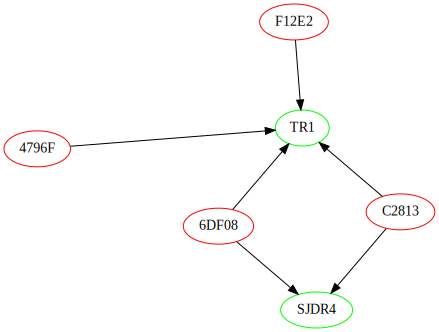

In [6]:
G = nx.MultiDiGraph()
G.add_nodes_from(df_tr2['USER_REDUCED'], bipartite = 1)
user = [v for v in G.nodes if G.nodes[v]['bipartite'] == 1]

G.add_nodes_from(df_tr2['ANTENNA_ID'], bipartite = 0)
antennas = [v for v in G.nodes if G.nodes[v]['bipartite'] == 0]

G.add_edges_from(df_tr2[['USER_REDUCED','ANTENNA_ID']].values)

d = graphviz.Digraph(format='png')
for n in user:
    d.node(str(n), color='red', label=n, size='2')

for n in antennas:
    d.node(str(n), color='green', label=n, size='2')

for (u,v) in G.edges():
    d.edge(str(u), str(v))

d.attr(size='10')

d.engine='circo'
d

In [ ]:
G.number_of_edges()